# Train 3 Regression Models on the Diabetes Dataset





This notebook loads the Diabetes dataset from sklearn, splits the data into training and validation sets, trains three diferent models and compare their MAE.

In [2]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import joblib
import pandas as pd

## Load Data

In [3]:
sample_data = load_diabetes()

df = pd.DataFrame(
    data=sample_data.data,
    columns=sample_data.feature_names)
df['Y'] = sample_data.target

In [4]:
print(df.shape)
df

(442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [5]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


## Split Data into Training and Validation Sets

In [6]:
X = df.drop('Y', axis=1).values
y = df['Y'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
data = {"train": {"X": X_train, "y": y_train},
        "test": {"X": X_test, "y": y_test}}

## Train Ridge

In [7]:
model_1 = linear_model.Ridge(alpha=0.5)
model_1.fit(data["train"]["X"], data["train"]["y"])

Ridge(alpha=0.5)

## Validate Ridge

In [8]:
preds = model_1.predict(data["test"]["X"])
mae = mean_absolute_error(preds, y_test)
metrics = {"mae": mae}
print(metrics)

{'mae': 45.49529882257045}


## Train Lasso

In [9]:
model_2 = linear_model.Lasso(alpha=0.5)
model_2.fit(data["train"]["X"], data["train"]["y"])

Lasso(alpha=0.5)

## Validate Lasso

In [10]:
preds = model_2.predict(data["test"]["X"])
mae_2 = mean_absolute_error(preds, y_test)
metrics = {"mae_2": mae_2}
print(metrics)

{'mae_2': 46.90316117293266}


## Train LassoLars

In [11]:
model_3 = linear_model.LassoLars(alpha=0.5, normalize=False)
model_3.fit(data["train"]["X"], data["train"]["y"])

LassoLars(alpha=0.5, normalize=False)

## Validate LassoLars

In [12]:
preds = model_3.predict(data["test"]["X"])
mae_3 = mean_absolute_error(preds, y_test)
metrics = {"mae_3": mae_3}
print(metrics)

{'mae_3': 46.90305919338657}


## Compare Results

In [13]:
print(f'Model_1: {mae}\n Model_2: {mae_2}\n Model_3: {mae_3}')

Model_1: 45.49529882257045
 Model_2: 46.90316117293266
 Model_3: 46.90305919338657


Cross Validation Score

In [14]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
val_scores = cross_val_score(model_1, X, y, cv=50)
print('Acurácia nos k-folds:', val_scores)
print('Média: {:.2} | Desvio: {:.2}'.format(np.mean(val_scores), np.std(val_scores)))

Acurácia nos k-folds: [-0.06152776  0.34159205  0.5008005   0.59416086  0.44593121  0.05704545
 -0.2256793   0.59640431 -0.16605689  0.33673711  0.21370567  0.04226249
  0.43728843 -0.01883851  0.63571383  0.48057413  0.35613814  0.42890984
  0.58757143  0.69263775 -0.08713098  0.21962569  0.20070654  0.19948126
  0.39158145  0.53002945  0.44153154  0.76542835  0.56311786  0.76493001
  0.30511285 -0.03256905  0.45759173  0.47315299 -0.30871407  0.60140718
  0.28927516  0.4195945   0.56575608  0.49397132  0.00797049  0.39616685
 -0.22050138  0.60275123  0.47929269  0.55622502  0.5037039   0.42190807
  0.58178395  0.52498715]
Média: 0.35 | Desvio: 0.27


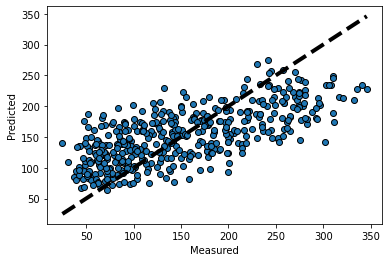

In [17]:
predicted = cross_val_predict(model_1, X, y, cv=50)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()